In [32]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [33]:
# Data loading
myopia_data = pd.read_csv("myopia.csv")
myopia_data.head(10)

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY,MYOPIC
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1,0
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0,0
5,6,1.744,22.139999,3.224,3.556,15.36,10,6,2,1,19,44,0,1,0
6,6,0.683,22.330000,3.186,3.654,15.49,12,7,2,1,8,36,0,1,0
7,6,1.272,22.389999,3.732,3.584,15.08,12,0,0,0,8,8,0,0,0
8,7,1.396,22.620001,3.464,3.408,15.74,4,0,3,1,3,12,0,0,0
9,6,0.972,22.740000,3.504,3.696,15.54,30,5,1,0,10,27,0,0,0


In [34]:
labels = myopia_data["MYOPIC"]

In [35]:
#Drop myopic column from the df 
myopia_data = myopia_data.drop(columns = ["MYOPIC"])

In [36]:
myopia_data.head()

,AGE,SPHEQ,AL,ACD,LT,VCD,SPORTHR,READHR,COMPHR,STUDYHR,TVHR,DIOPTERHR,MOMMY,DADMY
0,6,-0.052,21.889999,3.690,3.498,14.70,45,8,0,0,10,34,1,1
1,6,0.608,22.379999,3.702,3.392,15.29,4,0,1,1,7,12,1,1
2,6,1.179,22.490000,3.462,3.514,15.52,14,0,2,0,10,14,0,0
3,6,0.525,22.200001,3.862,3.612,14.73,18,11,0,0,4,37,0,1
4,5,0.697,23.290001,3.676,3.454,16.16,14,0,0,0,4,4,1,0


In [37]:
#Scale the data 

scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(myopia_data)

In [38]:
# Initialize PCA model

pca = PCA(n_components = 0.90)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [39]:
# Transform PCA data to a DataFrame
df_myopia_pca = pd.DataFrame(
    data=reduced, columns=["principal component 1", "principal component 2", "principal component 3", "principal component 4", "principal component 5", "principal component 6", "principal component 7"]
)
df_myopia_pca.head()

,principal component 1,principal component 2,principal component 3,principal component 4,principal component 5,principal component 6,principal component 7
0,-0.047126,-0.698117,0.131195,0.301321,0.250229,-0.684847,-0.088823
1,-0.075092,-0.711290,-0.157835,-0.181710,-0.052963,0.098904,-0.029929
2,0.077997,0.706997,-0.134836,-0.127710,0.158312,0.000833,-0.033427
3,0.717514,-0.079417,0.022076,0.163596,-0.147052,-0.302486,0.196091
4,-0.704678,0.060645,-0.141181,-0.405698,0.155630,-0.160868,0.189596


In [40]:
pca.explained_variance_ratio_

array([0.32040946, 0.31759715, 0.09261042, 0.06636212, 0.04495379,
       0.03569882, 0.0321611 ])

In [41]:
tsne = TSNE(learning_rate=250)
tsne_features = tsne.fit_transform(df_myopia_pca)

In [42]:
tsne_features.shape

(618, 2)

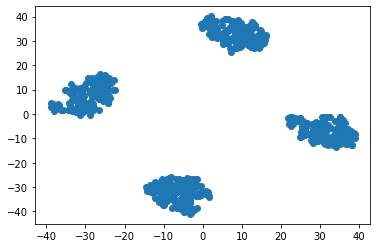

In [47]:
plt.scatter(tsne_features[:,0], tsne_features[:,1])
plt.show()

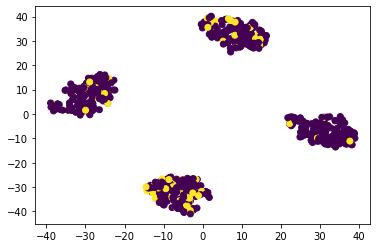

In [45]:
# Results colored by target value
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=labels)
plt.show()